In [15]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your cleaned merged dataset
df = pd.read_csv("/Users/snigdhajhureley/Desktop/OFI PROJECT /data/merged_data_clean.csv")

# Ensure target column exists
if "is_delayed" not in df.columns:
    df["delivery_delay_days"] = df["actual_delivery_days"] - df["promised_delivery_days"]
    df["is_delayed"] = (df["delivery_delay_days"] > 0).astype(int)

print("✅ Data loaded successfully. Shape:", df.shape)


✅ Data loaded successfully. Shape: (200, 40)


In [16]:
X = df.drop("is_delayed", axis=1)
y = df["is_delayed"]

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical columns:", list(cat_cols))
print("Numeric columns:", list(num_cols))


Categorical columns: ['order_id', 'order_date', 'customer_segment', 'priority', 'product_category', 'origin', 'destination', 'special_handling', 'carrier', 'delivery_status', 'quality_issue', 'route', 'weather_impact', 'feedback_date', 'feedback_text', 'would_recommend', 'issue_category']
Numeric columns: ['order_value_inr', 'promised_delivery_days', 'actual_delivery_days', 'customer_rating', 'delivery_cost_inr', 'distance_km', 'fuel_consumption_l', 'toll_charges_inr', 'traffic_delay_minutes', 'fuel_cost', 'labor_cost', 'vehicle_maintenance', 'insurance', 'packaging_cost', 'technology_platform_fee', 'other_overhead', 'rating', 'total_cost', 'delivery_delay_days', 'cost_per_km', 'traffic_delay_hours', 'priority_encoded']


In [17]:
# Create a preprocessing transformer for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"  # keep numeric columns as they are
)

# Combine preprocessing + RandomForest in a pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_pipeline.fit(X_train, y_train)

print("✅ Model pipeline trained successfully!")


✅ Model pipeline trained successfully!


In [21]:
y_pred = model_pipeline.predict(X_test)
print("\n📊 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



📊 Model Evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        24

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [23]:
# Save inside the app folder so Streamlit can access it
joblib.dump(model_pipeline, "/Users/snigdhajhureley/Desktop/OFI PROJECT /app/model.pkl")

print("✅ Model saved as app/model.pkl")


✅ Model saved as app/model.pkl


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Predict on test data
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("📊 Model Performance Metrics")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))


📊 Model Performance Metrics
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000
ROC-AUC:   1.0000

Detailed Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        24

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<Figure size 600x400 with 0 Axes>

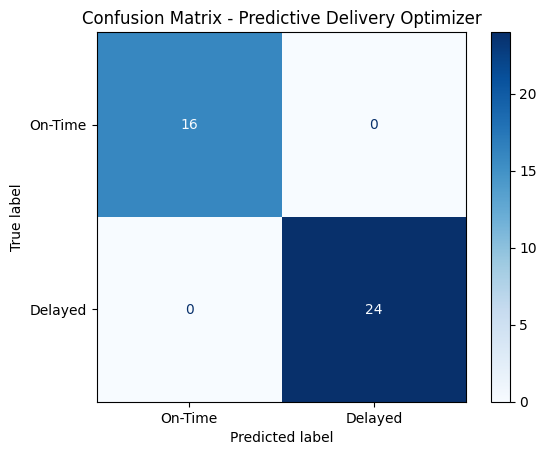

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["On-Time", "Delayed"])

plt.figure(figsize=(6,4))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Predictive Delivery Optimizer")
plt.show()


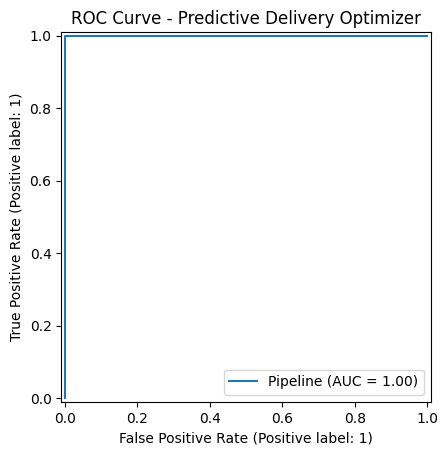

In [26]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_pipeline, X_test, y_test)
plt.title("ROC Curve - Predictive Delivery Optimizer")
plt.show()
